In [1]:
import sys
sys.path.append('..')

In [2]:
from __future__ import print_function
import os

import numpy as np
import scipy as sp

from utils import nsfg, thinkstats2, thinkplot

In [3]:
data_dir = os.getcwd() + "/../data/"
resp = nsfg.ReadFemResp(dct_file=data_dir + "2002FemResp.dct", dat_file=data_dir + "2002FemResp.dat.gz")

In [4]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


## Question 1

In [5]:
timesmar = resp["timesmar"].dropna()
jintendn = resp["jintendn"].dropna()

In [6]:
t_mean, t_std = timesmar.mean(), timesmar.std()
print("timesmar mean: {}:".format(t_mean))
print("timesmar standard dev.: {}:".format(t_std))

timesmar mean: 1.38705768299:
timesmar standard dev.: 4.29711302325:


In [7]:
j_mean, j_std = jintendn.mean(), jintendn.std()
print("jintendn mean: {}:".format(j_mean))
print("jintendn standard dev.: {}:".format(j_std))

jintendn mean: 2.70525568182:
jintendn standard dev.: 9.71010805146:


## Question 2

In [8]:
timesmar = resp["timesmar"]
jintendn = resp["jintendn"]

In [9]:
def plot_npdf(mean, std, label):
    pdf = thinkstats2.NormalPdf(mean, std)
    thinkplot.Pmf(pdf, label='Norm PDF of {}'.format(label))
    thinkplot.Config(xlabel=label, ylabel='PDF')

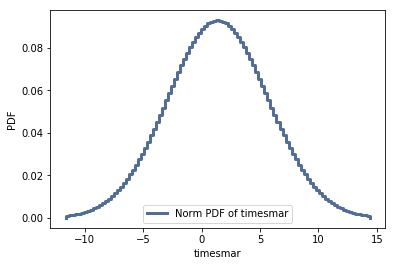

In [10]:
plot_npdf(t_mean, t_std, "timesmar")

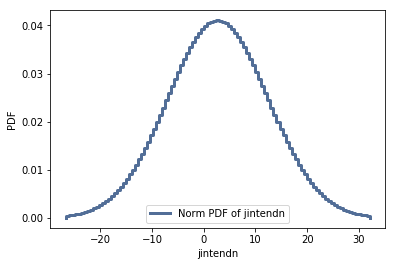

In [11]:
plot_npdf(j_mean, j_std, "jintendn")

## Question 3

Assuming values of "timesmar" and "jintendn" are normally distributed, "timesmar" is expected to range from ~-12 to ~15 and "jintendn" from ~-23 to ~31. The range of "jintend" is larger than "timesmar" because of higher variance. Their means are close to each other which can be observed looking at the graph. 

## Question 4

In [12]:
def plot_pdf(data, label):
    pdf = thinkstats2.Pmf(data)
    thinkplot.Pmf(pdf, label='PDF of {}'.format(label))
    thinkplot.Config(xlabel=label, ylabel='PDF')

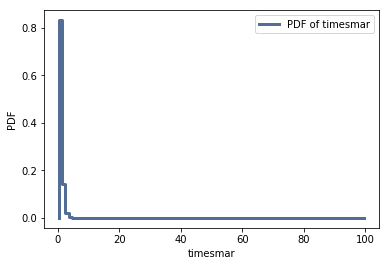

In [13]:
plot_pdf(timesmar, "timesmar")

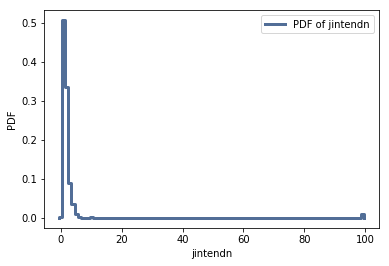

In [14]:
plot_pdf(jintendn, "jintendn")

## Question 5

In [15]:
timesmar = resp["timesmar"].dropna()
jintendn = resp["jintendn"].dropna()

In [16]:
print("Skewness of timesmar: {}".format(thinkstats2.Skewness(timesmar)))
print("Pearson median skewness of timesmar: {}".format(thinkstats2.PearsonMedianSkewness(timesmar)))

Skewness of timesmar: 22.2193072207
Pearson median skewness of timesmar: 0.27025442021


In [17]:
print("Skewness of jintendn: {}".format(thinkstats2.Skewness(jintendn)))
print("Pearson median skewness of jintendn: {}".format(thinkstats2.PearsonMedianSkewness(jintendn)))

Skewness of jintendn: 9.68691405793
Pearson median skewness of jintendn: 0.527036842972


In [18]:
timesmar = resp["timesmar"]
jintendn = resp["jintendn"]

## Question 6

The both timesmar and jintendn have positive skewness values. So they both are right skewed. Since outliers have disproportionate effect on sample skewness, it is better to interpret pearson median skewness values. According to values, jintendn is more rightly skewed than timesmar. By looking at value counts, we can validate rightness of pearson skewness values.

## Question 7

In [19]:
timesmar.value_counts()

1.0     3428
2.0      582
3.0       90
4.0       15
98.0       6
5.0        3
99.0       2
Name: timesmar, dtype: int64

In [20]:
jintendn.value_counts()

1.0     713
2.0     473
3.0     125
4.0      51
5.0      15
99.0     13
6.0       5
0.0       4
10.0      3
98.0      1
12.0      1
13.0      1
8.0       1
11.0      1
7.0       1
Name: jintendn, dtype: int64

In [21]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

Used -0.5 and +0.5 as range, believing that values are rounded to the closest integer.

In [22]:
j_timesmar = Jitter(timesmar)
j_jintendn = Jitter(jintendn)

Since the asked parameters (alpha=0.01 and s=2) makes the plot uninterpretable, there is another plot with different parameters that makes it interpretable.

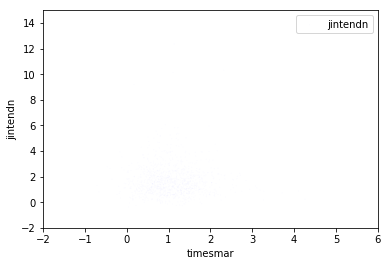

In [23]:
thinkplot.Scatter(j_timesmar, j_jintendn, alpha=0.01, s=2)
thinkplot.Config(xlabel='timesmar',
                 ylabel='jintendn',
                 axis=[-2, 6, -2, 15])

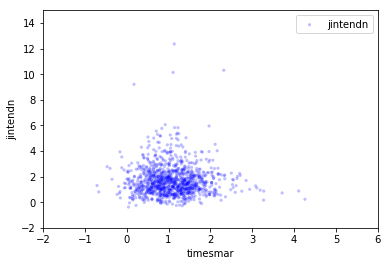

In [24]:
thinkplot.Scatter(j_timesmar, j_jintendn, alpha=0.25, s=10)
thinkplot.Config(xlabel='timesmar',
                 ylabel='jintendn',
                 axis=[-2, 6, -2, 15])

## Question 8

In [25]:
def plot_percentiles(data, x, y, start, stop):
    colors = ["black","blue","yellow"]
    percentages = [25, 50, 75]
    
    data = data.dropna(subset=[x, y])
    bins = np.arange(start, stop)
    indices = np.digitize(data[x], bins)
    groups = data.groupby(indices)
    
    x_ax = [group[x].mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group[y]) for i, group in groups]
    
    for color, percentage in zip(colors, percentages):
        y_ax = [cdf.Percentile(percentage) for cdf in cdfs]
        label = "{}th".format(percentage)
        thinkplot.Plot(x_ax, y_ax, label=label, color=color, alpha=0.5)

    thinkplot.Config(xlabel=x, ylabel=y)

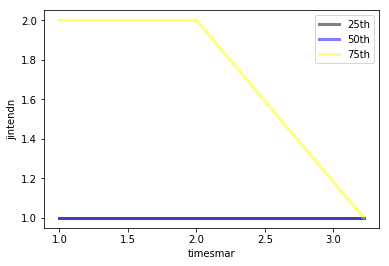

In [26]:
plot_percentiles(resp, "timesmar", "jintendn", -1, 4)

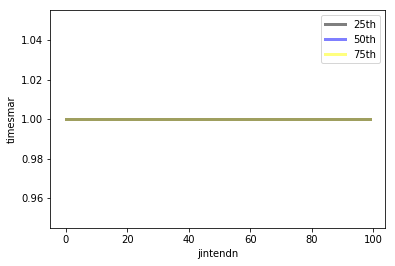

In [27]:
plot_percentiles(resp, "jintendn", "timesmar", -1, 14)

## Question 9

Both 25th and 50th percentiles of jintendn are located at 1.0 without changing with respect to timesmar. 75th percentile is located at 2.0 from 1.0 to 2.0 timesmar and dropped to 1.0 afterwards. All defined percentiles of timesmar are located at 1.0 without changing. We know from previos evaluations that timesmar value is mostly cumulated at value 1.0. 

## Question 10

In [28]:
cleaned = resp.dropna(subset=["jintendn", "timesmar"])

In [29]:
sp.stats.pearsonr(cleaned["jintendn"], cleaned["timesmar"])

(-0.03652346652385939, 0.23171606728546632)

In [30]:
sp.stats.spearmanr(cleaned["jintendn"], cleaned["timesmar"])

SpearmanrResult(correlation=-0.08337747790348257, pvalue=0.006256598683894427)

## Question 11

Pearson's correlation score is calculated using actual values whereas spearman's method uses ranks for calculation. As a result, pearson correlation is affected by outliers while spearman correlation does not. The both measures gives negative scores, indicating a negative linear correlation. However values are close to 0. So the correlation is not important in practise. Spearman score is lower than pearson's. As a result, we can conclude that outliers in the data makes the correlation more positive. The functions also calculated p-values. Looking at them and using significance level of 0.05, we can deduce that calculated pearson score is not statistically significant while spearman score gives a statistically significant result.

## Question 12

All in all, the both values are mostly accumulated between 1 to 5. Deviation in jintendn is higher than timesmar and so its values are more spread. Timesmar's at least 75 percent of values are accumulated at 1.0 while jintendn is the same at 50 percentile. Both jintendn and timesmar consist of integer values. They also have a very small negative linear correlation. Also, from the scatter plot we can deduce that there is no non-linear correlation. So we can assume that there is no correlation between timesmar and jintendn.